<a href="https://colab.research.google.com/github/Rushhaabhhh/ML-learning/blob/main/DelhiveryCaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181"

!gdown 1UCnSk_NN02jlzj0bbSZ_j-gdGUDDJxy4

Downloading...
From: https://drive.google.com/uc?id=1UCnSk_NN02jlzj0bbSZ_j-gdGUDDJxy4
To: /content/Jamboree.csv
100% 16.2k/16.2k [00:00<00:00, 45.0MB/s]


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [ ]:
df = pd.read_csv(url)
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
for col in df.columns:
  df['date'] = pd.to_datetime(df['trip_creation_time'])

for col in df.columns:
  df['time_of_date'] = df['date'].dt.time
  df['day_of_date'] = df['date'].dt.day
  df['month_of_date'] = df['date'].dt.month
  df['year_of_date'] = df['date'].dt.year
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,date,time_of_date,day_of_date,month_of_date,year_of_date
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,1.272727,14.0,11.0,11.9653,1.272727,2018-09-20 02:35:36.476840,02:35:36.476840,20,9,2018
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,1.200000,10.0,9.0,9.7590,1.111111,2018-09-20 02:35:36.476840,02:35:36.476840,20,9,2018
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,1.428571,16.0,7.0,10.8152,2.285714,2018-09-20 02:35:36.476840,02:35:36.476840,20,9,2018
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,1.550000,21.0,12.0,13.0224,1.750000,2018-09-20 02:35:36.476840,02:35:36.476840,20,9,2018
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,1.545455,6.0,5.0,3.9153,1.200000,2018-09-20 02:35:36.476840,02:35:36.476840,20,9,2018


In [ ]:
df['seg_key'] = df['trip_uuid'] + df['source_center'] + df['destination_center']

df['seg_key'].nunique()

26368

<Axes: >

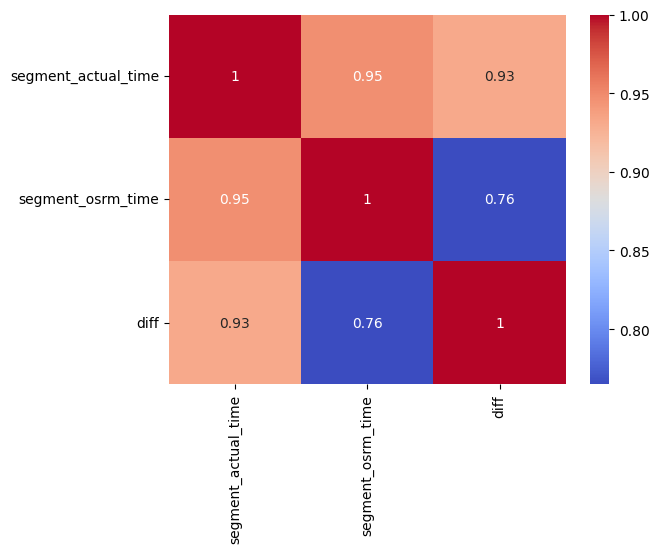

In [ ]:
actual_time_per_segment = df.groupby(['seg_key'])['segment_actual_time'].sum()
osrm_time_per_segment = df.groupby(['seg_key'])['segment_osrm_time'].sum()
segment_time_data = pd.concat([actual_time_per_segment, osrm_time_per_segment], axis=1)
segment_time_data['diff'] = segment_time_data['segment_actual_time'] - segment_time_data['segment_osrm_time']
segment_time_data[segment_time_data['diff'] < 0].shape

sns.heatmap(segment_time_data.corr(), annot=True, cmap='coolwarm')

<ipython-input-9-fe20b476a8b1>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


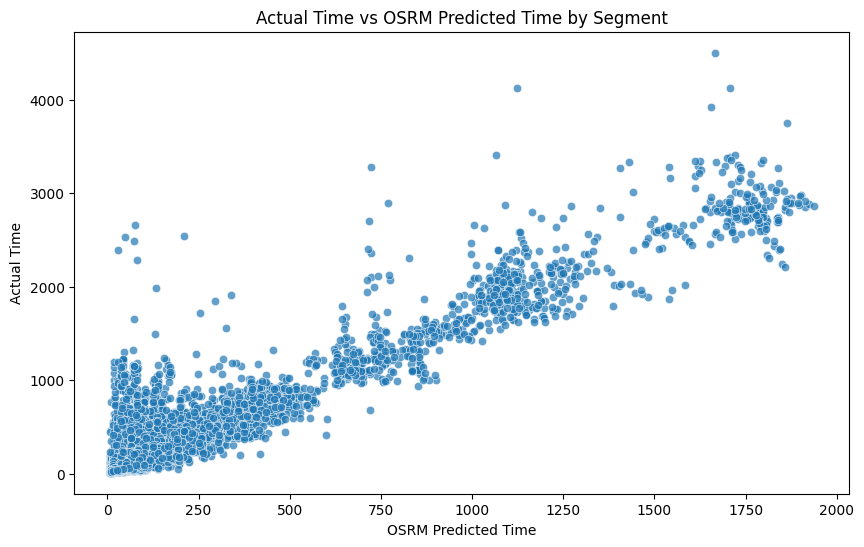

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='segment_osrm_time',
    y='segment_actual_time',
    data=segment_time_data,
    palette='Set5',
    alpha=0.7
)
plt.title('Actual Time vs OSRM Predicted Time by Segment')
plt.xlabel('OSRM Predicted Time')
plt.ylabel('Actual Time')
plt.show()

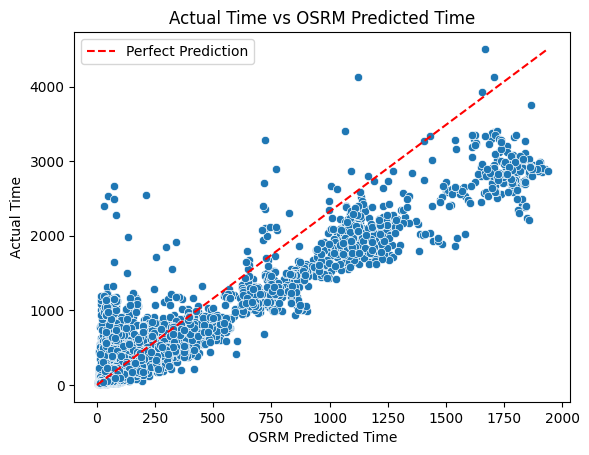

In [ ]:
sns.scatterplot(
    x='segment_osrm_time',
    y='segment_actual_time',
    data=segment_time_data
)
plt.plot(
    [0, max(segment_time_data['segment_osrm_time'])],
    [0, max(segment_time_data['segment_actual_time'])],
    'r--',
    label="Perfect Prediction"
)
plt.xlabel('OSRM Predicted Time')
plt.ylabel('Actual Time')
plt.title('Actual Time vs OSRM Predicted Time')
plt.legend()
plt.show()

In [ ]:
segment_time_data['time_diff'] = segment_time_data['segment_actual_time'] - segment_time_data['segment_osrm_time']

stat, p_value = stats.shapiro(segment_time_data['time_diff'])
print(f"Shapiro-Wilk test p-value: {p_value}")

t_stat, p_val = stats.ttest_1samp(segment_time_data['time_diff'], 0)
print(f"t-statistic : {t_stat}, p-value : {p_val}")

if p_val < 0.05 :
    print("Reject the null hypothesis : There is a significant difference between the actual and predicted times.")
else :
    print("Fail to reject the null hypothesis : There is no significant difference between the actual and predicted times.")

Shapiro-Wilk test p-value: 5.554626250049185e-125
t-statistic : 83.00449241458911, p-value : 0.0
Reject the null hypothesis : There is a significant difference between the actual and predicted times.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 26368.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
segment_time_data['actual_time'] = df.groupby(['seg_key'])['segment_actual_time'].sum()
segment_time_data.head()

,segment_actual_time,segment_osrm_time,diff,time_diff,actual_time
seg_key,,,,,
trip-153671041653548748IND209304AAAIND000000ACB,728.0,534.0,194.0,194.0,728.0
trip-153671041653548748IND462022AAAIND209304AAA,820.0,474.0,346.0,346.0,820.0
trip-153671042288605164IND561203AABIND562101AAA,46.0,26.0,20.0,20.0,46.0
trip-153671042288605164IND572101AAAIND561203AAB,95.0,39.0,56.0,56.0,95.0
trip-153671043369099517IND000000ACBIND160002AAC,608.0,231.0,377.0,377.0,608.0


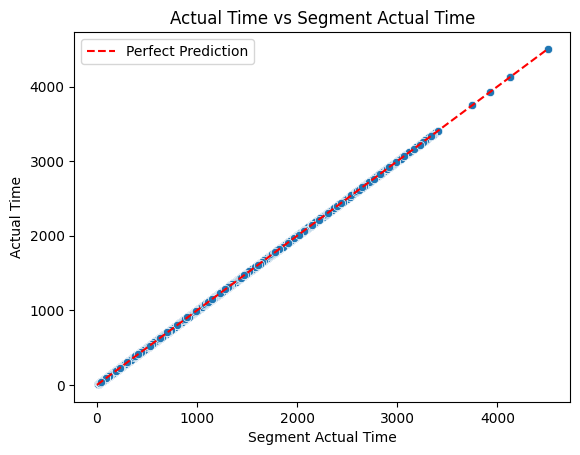

In [ ]:
sns.scatterplot(
    x='segment_actual_time',
    y='actual_time',
    data=segment_time_data
)
plt.plot(
    [0, max(segment_time_data['segment_actual_time'])],
    [0, max(segment_time_data['actual_time'])],
    'r--',
    label="Perfect Prediction"
)
plt.xlabel('Segment Actual Time')
plt.ylabel('Actual Time')
plt.title('Actual Time vs Segment Actual Time')
plt.legend()
plt.show()

In [ ]:
segment_time_data['time_diff'] = segment_time_data['segment_actual_time'] - segment_time_data['actual_time']

stat, p_value = stats.shapiro(segment_time_data['time_diff'])
print(f"Shapiro-Wilk test p-value: {p_value}")

t_stat, p_val = stats.ttest_1samp(segment_time_data['time_diff'], 0)
print(f"t-statistic: {t_stat}, p-value: {p_val}")

print()
if p_val < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the actual and predicted times.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the actual and predicted times.")
print()


Shapiro-Wilk test p-value: 1.0
t-statistic: nan, p-value: nan

Fail to reject the null hypothesis: There is no significant difference between the actual and predicted times.



/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 26368.
  res = hypotest_fun_out(*samples, **kwds)


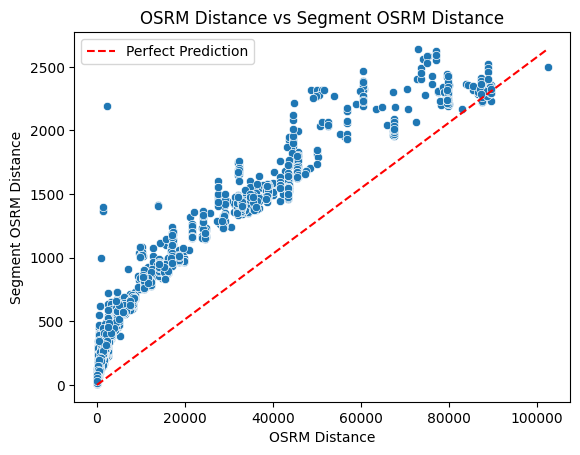

In [ ]:
segment_time_data['osrm_distance_agg'] = df.groupby(['seg_key'])['osrm_distance'].sum()
segment_time_data['segment_osrm_distance_agg'] = df.groupby(['seg_key'])['segment_osrm_distance'].sum()

sns.scatterplot(
    x='osrm_distance_agg',
    y='segment_osrm_distance_agg',
    data=segment_time_data
)
plt.plot([0, max(segment_time_data['osrm_distance_agg'])],
         [0, max(segment_time_data['segment_osrm_distance_agg'])],
         'r--', label="Perfect Prediction")

plt.xlabel('OSRM Distance')
plt.ylabel('Segment OSRM Distance')
plt.title('OSRM Distance vs Segment OSRM Distance')

plt.legend()
plt.show()


In [ ]:
segment_time_data['time_diff'] = segment_time_data['segment_osrm_distance_agg'] - segment_time_data['osrm_distance_agg']
stat, p_value = stats.shapiro(segment_time_data['time_diff'])

print(f"Shapiro-Wilk test p-value : {p_value}")

t_stat, p_val = stats.ttest_1samp(segment_time_data['time_diff'], 0)
print(f"t-statistic : {t_stat}, p-value : {p_val}")

print()
if p_val < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the actual and predicted distances.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the actual and predicted distances.")
print()

Shapiro-Wilk test p-value : 2.2294096377416667e-138
t-statistic : -30.354079228329542, p-value : 5.889098074935691e-199

Reject the null hypothesis: There is a significant difference between the actual and predicted distances.



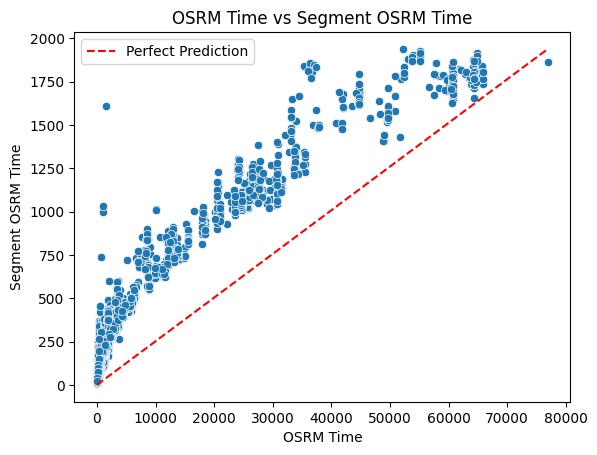

In [ ]:
segment_time_data['osrm_time_agg'] = df.groupby(['seg_key'])['osrm_time'].sum()
segment_time_data['segment_osrm_time_agg'] = df.groupby(['seg_key'])['segment_osrm_time'].sum()

sns.scatterplot(
    x='osrm_time_agg',
    y='segment_osrm_time_agg',
    data=segment_time_data
)

plt.plot([0, max(segment_time_data['osrm_time_agg'])],
         [0, max(segment_time_data['segment_osrm_time_agg'])],
         'r--', label="Perfect Prediction")

plt.xlabel('OSRM Time')
plt.ylabel('Segment OSRM Time')
plt.title('OSRM Time vs Segment OSRM Time')

plt.legend()
plt.show()

In [ ]:
segment_time_data['time_diff'] =segment_time_data['segment_osrm_time_agg'] -segment_time_data['osrm_time_agg']

print(f"Shapiro-Wilk test p-value : {p_value}")

t_stat, p_val = stats.ttest_1samp(segment_time_data['time_diff'], 0)
print(f"t-statistic : {t_stat}, p-value : {p_val}")

print()
if p_val < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the actual and predicted times.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the actual and predicted times.")
print()


Shapiro-Wilk test p-value : 2.2294096377416667e-138
t-statistic : -30.616387259869175, p-value : 2.5813253598938318e-202

Reject the null hypothesis: There is a significant difference between the actual and predicted times.



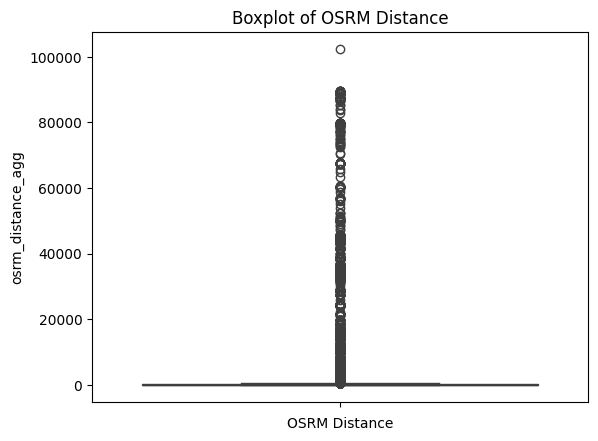

In [ ]:
sns.boxplot(y=segment_time_data['osrm_distance_agg'])
plt.xlabel('OSRM Distance')
plt.title('Boxplot of OSRM Distance')
plt.show()

plt.show()

In [ ]:
iso_forest = IsolationForest(contamination=0.1)

outliers = iso_forest.fit_predict(segment_time_data)
outliers = segment_time_data[outliers == -1]

print("Outliers:", outliers)

Outliers:                                                  segment_actual_time  \
seg_key                                                                
trip-153671041653548748IND209304AAAIND000000ACB                728.0   
trip-153671041653548748IND462022AAAIND209304AAA                820.0   
trip-153671043369099517IND000000ACBIND160002AAC                608.0   
trip-153671043369099517IND562132AAAIND000000ACB               2700.0   
trip-153671121411074590IND501359AAEIND515004AAA                466.0   
...                                                              ...   
trip-153860879439383883IND562132AAAIND000000ACB               2830.0   
trip-153860880135634048IND425405AAAIND424006AAA                978.0   
trip-153861007249500192IND847404AABIND842001AAA                625.0   
trip-153861014185597051IND206001AAAIND000000ACB                525.0   
trip-153861014185597051IND462022AAAIND209304AAA                991.0   

                                                 segm

In [ ]:
segment_time_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26368 entries, trip-153671041653548748IND209304AAAIND000000ACB to trip-153861118270144424IND583201AAAIND583119AAA
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   segment_actual_time        26368 non-null  float64
 1   segment_osrm_time          26368 non-null  float64
 2   diff                       26368 non-null  float64
 3   time_diff                  26368 non-null  float64
 4   actual_time                26368 non-null  float64
 5   osrm_distance_agg          26368 non-null  float64
 6   segment_osrm_distance_agg  26368 non-null  float64
 7   osrm_time_agg              26368 non-null  float64
 8   segment_osrm_time_agg      26368 non-null  float64
dtypes: float64(9)
memory usage: 3.0+ MB


Processing column: segment_actual_time
Outliers for segment_actual_time :  seg_key
trip-153671043369099517IND562132AAAIND000000ACB    2700.0
trip-153671321710455800IND421302AAGIND000000ACB    2073.0
trip-153671328307356992IND110037AAMIND421302AAG    1963.0
trip-153671715851493285IND000000ACBIND751002AAB    2242.0
trip-153672000309775410IND421302AAGIND562132AAA    1541.0
                                                    ...  
trip-153859449473366865IND562132AAAIND302014AAA    2651.0
trip-153860352246282031IND000000ACBIND712311AAA    1909.0
trip-153860570045461434IND000000ACBIND834002AAB    1608.0
trip-153860698042160875IND421302AAGIND131028AAB    1781.0
trip-153860879439383883IND562132AAAIND000000ACB    2830.0
Name: segment_actual_time, Length: 678, dtype: float64



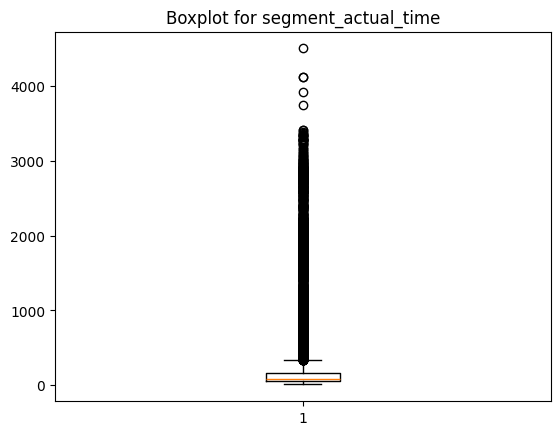


Processing column: segment_osrm_time
Outliers for segment_osrm_time :  seg_key
trip-153671043369099517IND562132AAAIND000000ACB    1710.0
trip-153671321710455800IND421302AAGIND000000ACB    1003.0
trip-153671328307356992IND110037AAMIND421302AAG    1131.0
trip-153671715851493285IND000000ACBIND751002AAB    1849.0
trip-153672022267158924IND000000ACBIND834002AAB    1077.0
                                                    ...  
trip-153860199040825668IND462022AAAIND000000ACB     835.0
trip-153860352246282031IND000000ACBIND712311AAA    1059.0
trip-153860570045461434IND000000ACBIND834002AAB     955.0
trip-153860698042160875IND421302AAGIND131028AAB    1220.0
trip-153860879439383883IND562132AAAIND000000ACB    1764.0
Name: segment_osrm_time, Length: 697, dtype: float64



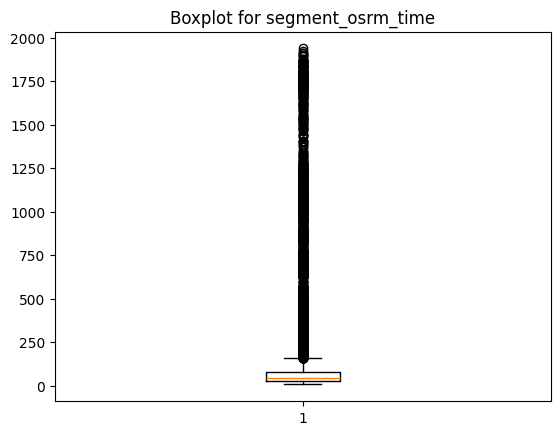


Processing column: actual_time
Outliers for actual_time :  seg_key
trip-153671043369099517IND562132AAAIND000000ACB    2700.0
trip-153671321710455800IND421302AAGIND000000ACB    2073.0
trip-153671328307356992IND110037AAMIND421302AAG    1963.0
trip-153671715851493285IND000000ACBIND751002AAB    2242.0
trip-153672000309775410IND421302AAGIND562132AAA    1541.0
                                                    ...  
trip-153859449473366865IND562132AAAIND302014AAA    2651.0
trip-153860352246282031IND000000ACBIND712311AAA    1909.0
trip-153860570045461434IND000000ACBIND834002AAB    1608.0
trip-153860698042160875IND421302AAGIND131028AAB    1781.0
trip-153860879439383883IND562132AAAIND000000ACB    2830.0
Name: actual_time, Length: 678, dtype: float64



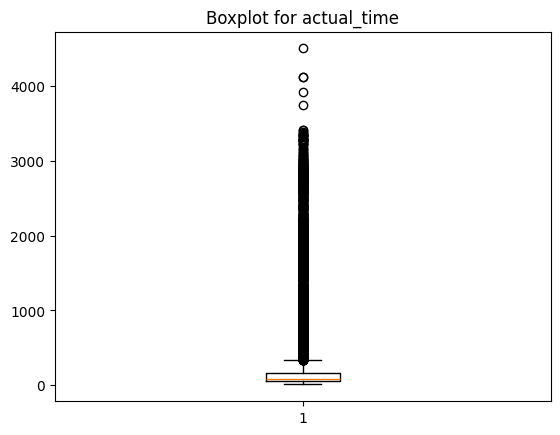


Processing column: osrm_distance_agg
Outliers for osrm_distance_agg :  seg_key
trip-153671043369099517IND562132AAAIND000000ACB    87471.5079
trip-153671321710455800IND421302AAGIND000000ACB    31927.4971
trip-153671328307356992IND110037AAMIND421302AAG    35564.0865
trip-153671715851493285IND000000ACBIND751002AAB    50727.9158
trip-153672022267158924IND000000ACBIND834002AAB    28932.3198
                                                      ...    
trip-153859449473366865IND562132AAAIND302014AAA    67527.2679
trip-153860352246282031IND000000ACBIND712311AAA    43470.3357
trip-153860570045461434IND000000ACBIND834002AAB    28486.4523
trip-153860698042160875IND421302AAGIND131028AAB    38702.5606
trip-153860879439383883IND562132AAAIND000000ACB    87286.7382
Name: osrm_distance_agg, Length: 550, dtype: float64



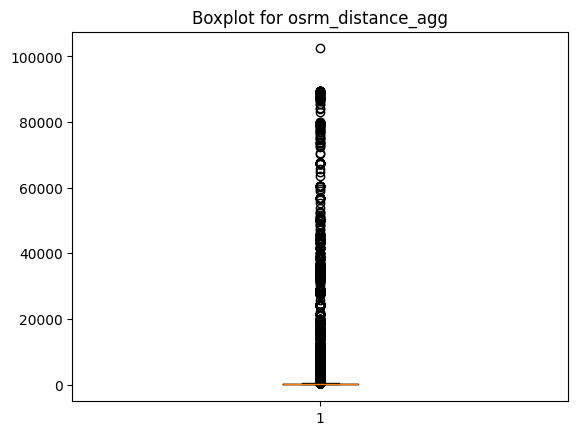


Processing column: segment_osrm_distance_agg
Outliers for segment_osrm_distance_agg :  seg_key
trip-153671043369099517IND562132AAAIND000000ACB    2227.5270
trip-153671321710455800IND421302AAGIND000000ACB    1360.3053
trip-153671328307356992IND110037AAMIND421302AAG    1472.7442
trip-153671715851493285IND000000ACBIND751002AAB    2311.6569
trip-153671742249756615IND000000ACBIND821115AAB    1050.7238
                                                     ...    
trip-153859449473366865IND562132AAAIND302014AAA    2010.7604
trip-153860352246282031IND000000ACBIND712311AAA    1497.6331
trip-153860570045461434IND000000ACBIND834002AAB    1288.2827
trip-153860698042160875IND421302AAGIND131028AAB    1560.8186
trip-153860879439383883IND562132AAAIND000000ACB    2288.1574
Name: segment_osrm_distance_agg, Length: 683, dtype: float64



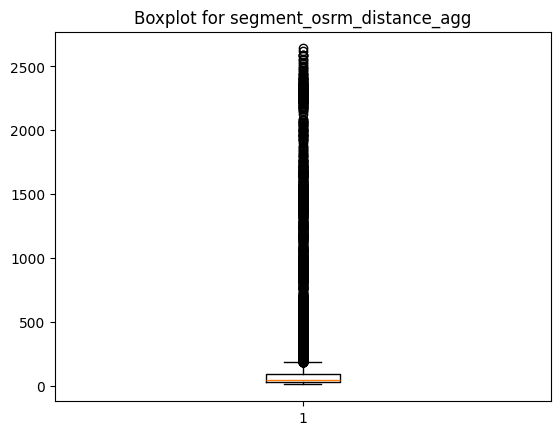


Processing column: osrm_time_agg
Outliers for osrm_time_agg :  seg_key
trip-153671043369099517IND562132AAAIND000000ACB    64341.0
trip-153671321710455800IND421302AAGIND000000ACB    23589.0
trip-153671328307356992IND110037AAMIND421302AAG    26604.0
trip-153671715851493285IND000000ACBIND751002AAB    36884.0
trip-153672022267158924IND000000ACBIND834002AAB    20500.0
                                                    ...   
trip-153859449473366865IND562132AAAIND302014AAA    49588.0
trip-153860352246282031IND000000ACBIND712311AAA    30737.0
trip-153860570045461434IND000000ACBIND834002AAB    20204.0
trip-153860698042160875IND421302AAGIND131028AAB    28270.0
trip-153860879439383883IND562132AAAIND000000ACB    64270.0
Name: osrm_time_agg, Length: 549, dtype: float64



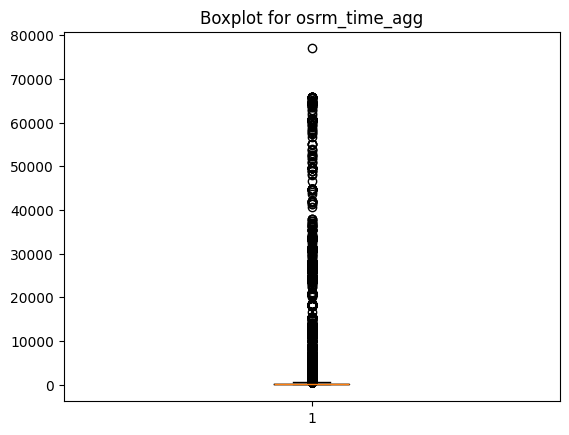


Processing column: segment_osrm_time_agg
Outliers for segment_osrm_time_agg :  seg_key
trip-153671043369099517IND562132AAAIND000000ACB    1710.0
trip-153671321710455800IND421302AAGIND000000ACB    1003.0
trip-153671328307356992IND110037AAMIND421302AAG    1131.0
trip-153671715851493285IND000000ACBIND751002AAB    1849.0
trip-153672022267158924IND000000ACBIND834002AAB    1077.0
                                                    ...  
trip-153860199040825668IND462022AAAIND000000ACB     835.0
trip-153860352246282031IND000000ACBIND712311AAA    1059.0
trip-153860570045461434IND000000ACBIND834002AAB     955.0
trip-153860698042160875IND421302AAGIND131028AAB    1220.0
trip-153860879439383883IND562132AAAIND000000ACB    1764.0
Name: segment_osrm_time_agg, Length: 697, dtype: float64



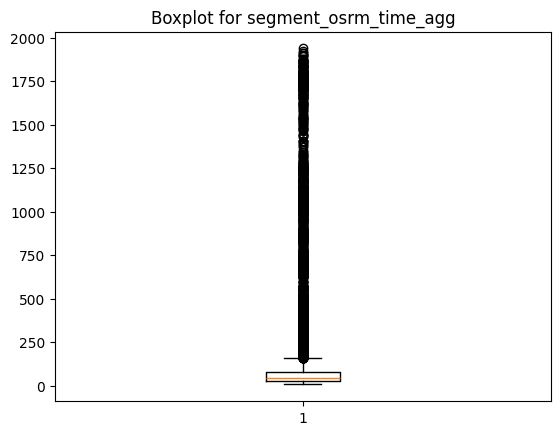


All outliers detected : 
{'segment_actual_time': seg_key
trip-153671043369099517IND562132AAAIND000000ACB    2700.0
trip-153671321710455800IND421302AAGIND000000ACB    2073.0
trip-153671328307356992IND110037AAMIND421302AAG    1963.0
trip-153671715851493285IND000000ACBIND751002AAB    2242.0
trip-153672000309775410IND421302AAGIND562132AAA    1541.0
                                                    ...  
trip-153859449473366865IND562132AAAIND302014AAA    2651.0
trip-153860352246282031IND000000ACBIND712311AAA    1909.0
trip-153860570045461434IND000000ACBIND834002AAB    1608.0
trip-153860698042160875IND421302AAGIND131028AAB    1781.0
trip-153860879439383883IND562132AAAIND000000ACB    2830.0
Name: segment_actual_time, Length: 678, dtype: float64, 'segment_osrm_time': seg_key
trip-153671043369099517IND562132AAAIND000000ACB    1710.0
trip-153671321710455800IND421302AAGIND000000ACB    1003.0
trip-153671328307356992IND110037AAMIND421302AAG    1131.0
trip-153671715851493285IND000000ACBIND751002A

In [ ]:
outliers = {}

for col in segment_time_data.columns:
    if col not in ('seg_key', 'diff', 'time_diff'):
        print(f"Processing column: {col}")

        z_scores = stats.zscore(segment_time_data[col])

        outliers[col] = segment_time_data[col][np.abs(z_scores) > 3]
        print(f"Outliers for {col} : ", outliers[col])
        print()

        plt.boxplot(segment_time_data[col])
        plt.title(f"Boxplot for {col}")
        plt.show()
        print()

print("All outliers detected : ")
print(outliers)

In [ ]:
print(outliers.keys())

print()
for key in outliers.keys():
    print(f"Outliers for {key} : ", outliers[key])

dict_keys(['segment_actual_time', 'segment_osrm_time', 'actual_time', 'osrm_distance_agg', 'segment_osrm_distance_agg', 'osrm_time_agg', 'segment_osrm_time_agg'])

Outliers for segment_actual_time :  seg_key
trip-153671043369099517IND562132AAAIND000000ACB    2700.0
trip-153671321710455800IND421302AAGIND000000ACB    2073.0
trip-153671328307356992IND110037AAMIND421302AAG    1963.0
trip-153671715851493285IND000000ACBIND751002AAB    2242.0
trip-153672000309775410IND421302AAGIND562132AAA    1541.0
                                                    ...  
trip-153859449473366865IND562132AAAIND302014AAA    2651.0
trip-153860352246282031IND000000ACBIND712311AAA    1909.0
trip-153860570045461434IND000000ACBIND834002AAB    1608.0
trip-153860698042160875IND421302AAGIND131028AAB    1781.0
trip-153860879439383883IND562132AAAIND000000ACB    2830.0
Name: segment_actual_time, Length: 678, dtype: float64
Outliers for segment_osrm_time :  seg_key
trip-153671043369099517IND562132AAAIND000000ACB    1710.0

In [ ]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,date,time_of_date,day_of_date,month_of_date,year_of_date,seg_key
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,14.0,11.0,11.9653,1.272727,2018-09-20 02:35:36.476840,02:35:36.476840,20,9,2018,trip-153741093647649320IND388121AAAIND388620AAB
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,10.0,9.0,9.7590,1.111111,2018-09-20 02:35:36.476840,02:35:36.476840,20,9,2018,trip-153741093647649320IND388121AAAIND388620AAB
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,16.0,7.0,10.8152,2.285714,2018-09-20 02:35:36.476840,02:35:36.476840,20,9,2018,trip-153741093647649320IND388121AAAIND388620AAB
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,21.0,12.0,13.0224,1.750000,2018-09-20 02:35:36.476840,02:35:36.476840,20,9,2018,trip-153741093647649320IND388121AAAIND388620AAB
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,6.0,5.0,3.9153,1.200000,2018-09-20 02:35:36.476840,02:35:36.476840,20,9,2018,trip-153741093647649320IND388121AAAIND388620AAB
